# 2th_hometask

In [1]:
import numpy as np

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt
import seaborn as sns

## 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [5]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [6]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

##### Масштабирование данных.

In [7]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

##### Далее рассмотрим изменения весов при коэффициенте нормализации меняющимся на порядок.

In [8]:
lambda_ = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2]

dict_w = {}

for i in lambda_:
    dict_w[i] = gradient_descent_reg_l2(X_st, y, iterations=10000, reg=i)

Iter: 0, weights: [-1.43373336  0.23824465 -0.79149443  0.01378219], error 3529.5241109212466
Iter: 1000, weights: [9.06881961 1.99482323 0.90946371 1.78636624], error 2329.1533460085966
Iter: 2000, weights: [17.66741071  3.06842904  1.88458963  2.8478862 ], error 1554.058249038952
Iter: 3000, weights: [24.70720085  3.73467937  2.42938629  3.48725067], error 1044.9123726719856
Iter: 4000, weights: [30.47077825  4.1574433   2.71942197  3.87610507], error 707.2834325600359
Iter: 5000, weights: [35.18950191  4.43417814  2.85899464  4.11641303], error 482.2399196290802
Iter: 6000, weights: [39.05278881  4.62287123  2.91005094  4.26873184], error 331.8220745237704
Iter: 7000, weights: [42.21571734  4.7580505   2.90937144  4.36901514], error 231.13003646710226
Iter: 8000, weights: [44.80525239  4.86029909  2.87878302  4.43859791], error 163.66572026395946
Iter: 9000, weights: [46.92534196  4.94190973  2.83122757  4.49013   ], error 118.43833155855297
Final MSE: 88.10466628299868
Iter: 0, wei

Iter: 3000, weights: [9.12919924 1.35542585 1.33793071 1.46335965], error 2330.417489916709
Iter: 4000, weights: [9.33014551 1.41947412 1.34063986 1.44366406], error 2310.7076170295577
Iter: 5000, weights: [9.39062577 1.4398357  1.33966773 1.43488901], error 2304.8413166122673
Iter: 6000, weights: [9.40882895 1.44648983 1.33892    1.4314171 ], error 2303.0875732063278
Iter: 7000, weights: [9.41430769 1.44870741 1.33857349 1.43011794], error 2302.562021378507
Iter: 8000, weights: [9.41595667 1.44945641 1.33843516 1.42964609], error 2302.4042840105776
Iter: 9000, weights: [9.41645297 1.44971164 1.33838355 1.42947761], error 2302.356889830166
Final MSE: 2302.3426381175514
Iter: 0, weights: [-0.90895817  1.33875711  0.26530054  2.36514129], error 3386.0312345006714
Iter: 1000, weights: [1.107772   0.2055045  0.19794318 0.2058347 ], error 3215.851266214858
Iter: 2000, weights: [1.10784313 0.20547419 0.19795963 0.20576234], error 3215.8451091898673
Iter: 3000, weights: [1.10784314 0.20547419

In [9]:
dict_w

{1e-08: array([48.65952167,  5.0101817 ,  2.77442809,  4.53106466]),
 1e-07: array([49.03827792,  4.67514684,  3.52165624,  4.0765453 ]),
 1e-06: array([48.64980214,  4.72937695,  3.2556811 ,  4.29856145]),
 1e-05: array([49.05514597,  4.97632002,  2.57921619,  4.78216053]),
 0.0001: array([48.56908599,  4.80479916,  2.56941385,  4.93326996]),
 0.001: array([49.0878435 ,  5.3750935 ,  2.51787112,  4.45425877]),
 0.01: array([48.72789997,  3.58477796,  3.3440962 ,  5.28308952]),
 0.1: array([47.29634447,  4.76054586,  2.93214653,  4.38133637]),
 1: array([35.77193653,  3.86593767,  2.85022636,  3.62633404]),
 10.0: array([9.41660227, 1.44979907, 1.33836498, 1.42941808]),
 100.0: array([1.10784314, 0.20547419, 0.19795963, 0.20576233])}

### Средние значения весов

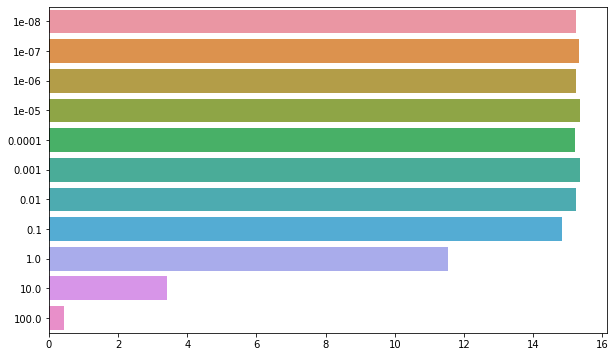

In [10]:
plt.figure(figsize=(10, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i].mean())
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')

plt.show()

##### Средние значения весов убывают при увеличении коэффициента регуляризации.

### Значения веса первого признака

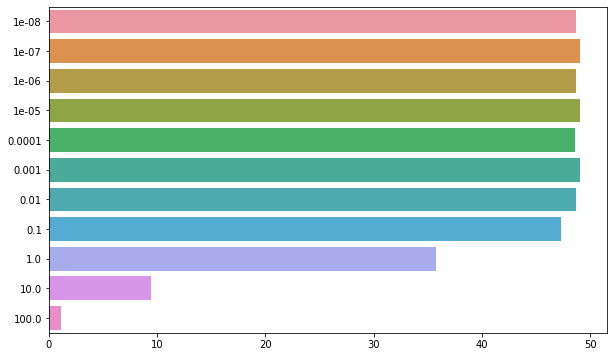

In [11]:
plt.figure(figsize=(10, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][0])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')

plt.show()

##### Значения самого большого веса первого признака убывают при увеличении кэффициента регуляризации.

### Значения веса второго признака

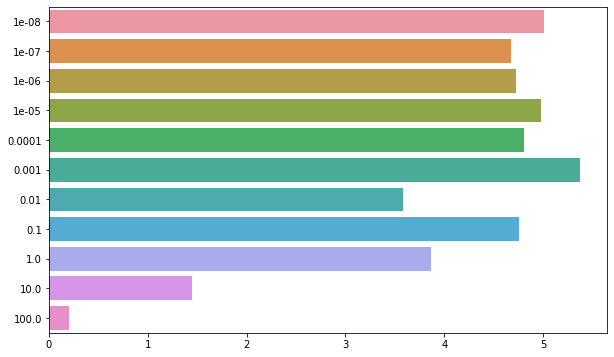

In [12]:
plt.figure(figsize=(10, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][1])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')

plt.show()

##### Значения веса второго признака сперва колеблятся, затем убывают при увеличении кэффициента регуляризации.

### Значения веса третьего признака

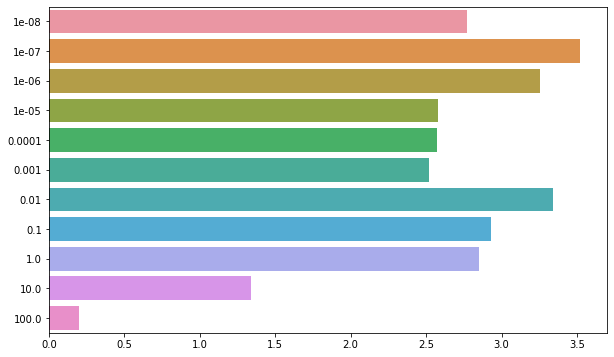

In [13]:
plt.figure(figsize=(10, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][2])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')

plt.show()

##### Значения веса третьего признака сперва колеблятся, затем убывают при увеличении кэффициента регуляризации.

### Значения веса четвёртого признака

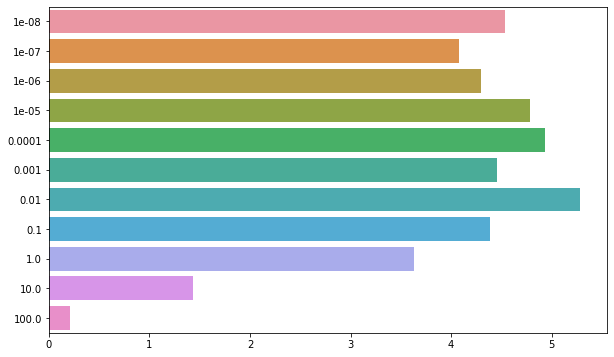

In [14]:
plt.figure(figsize=(10, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][3])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')

plt.show()

##### Значения веса четвёртого признака сперва колеблятся, затем убывают при увеличении кэффициента регуляризации.

## 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [15]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

##### Различие с функцией gradient_descent_reg_l2 заключаются только в производной весов признаков по норме L1. Вместе весов признаков будет использоваться signum-функция весов признаков.

In [16]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-3)

Iter: 0, weights: [ 0.83576214  0.39339485 -1.3508379  -0.71744735], error 3444.050891122498
Iter: 500, weights: [56.49721645  5.99877328  0.95807965  5.51648056], error 25.205634149377236
Iter: 1000, weights: [56.49949991  6.20387551  0.11339292  6.18496747], error 24.943561113002787
Iter: 1500, weights: [56.4995      6.26662916 -0.1841987   6.42993245], error 24.909847275697352
Iter: 2000, weights: [56.4995      6.28867632 -0.29060039  6.51774883], error 24.9053798356388
Iter: 2500, weights: [56.4995      6.29660963 -0.32889803  6.54935911], error 24.904751119103274
Iter: 3000, weights: [56.4995      6.29946503 -0.3426829   6.56073703], error 24.904651693945915
Iter: 3500, weights: [56.4995      6.30049281 -0.34764465  6.56483243], error 24.904632344491564
Iter: 4000, weights: [56.4995      6.30086275 -0.34943059  6.56630653], error 24.904627509464714
Iter: 4500, weights: [56.4995      6.3009959  -0.35007342  6.56683712], error 24.90462604505007
Final MSE: 24.904625553693034


array([56.4995    ,  6.30104377, -0.35030454,  6.56702788])

##### Результат работы L1-регуляризации - наименьшие веса стремятся к нулю.

### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

##### Можно, но тогда поломаются интерпретации каждого из scaler'ов:
##### StandardScaler не даст корректной информации о сдвиге относительно среднего выборки;
##### MinMaxScaler не даст корректной информации о "расстояниях" между объектами.

## 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [17]:
# Генерация матрицы признаков X (10000 x 2), вектора ответов y (10000 x 1) и истинных весов признаков w_true (2 веса).
X, y, w_true = make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, noise=5, coef=True, random_state=1)

X, y, w_true

(array([[-2.26169034, -0.06631685],
        [ 0.82793629, -1.23225566],
        [ 0.89199684, -0.18048996],
        ...,
        [-0.69132388,  0.31501402],
        [ 2.60755891, -0.70850487],
        [-0.67360364, -0.33258467]]),
 array([-67.09998142, -36.25610328,  10.12953444, ...,  -2.79481517,
         49.14947545, -44.75846545]),
 array([30.51944327, 48.38204155]))

### MSE

In [18]:
def MSE(y, y_pred, n):
    return sum((y_pred - y)**2) / n

### GD

In [19]:
%%time

# Количество векторов для усреднения весов.
n = X.shape[0]

# Счётчик итераций.
i_gd = 0

# Скорость обучения.
learning_rate = 3e-3

# Разница весов.
w_difference = np.inf

# Порог изменения весов для остановки обучения.
epsilon = 1e-6

# Счётчик аварийной остановки.
emergency_stop = 1e+5

# Изначальное предположение о весах.
w = [0, 0]

# Список ошибок метода Градиентный спуск.
dict_mse_gd = {}

print(f'Number of objects = {n} \
       \nLearning rate = {learning_rate} \
       \nInitial weights = {w} \
       \nepsilon = {epsilon}\n')

while w_difference > epsilon:
    # Прогноз целевой переменной.
    y_pred = X@w
    
#     list_mse_gd.append(MSE(y, y_pred, n))
    dict_mse_gd[i_gd] = MSE(y, y_pred, n)
    
    # Вычисление новых весов признаков при помощи градиентного спуска.
    w_new = w - learning_rate * 2 * X.T@(y_pred - y) / n
    
    # Вычисление расстояния между новыми и предыдущими весами признаков.
    w_difference = np.linalg.norm(w - w_new, ord=2)
    
    if i_gd%100 == 0:
        print(f'Iteration #{i_gd}: w_new = {w_new}, MSE = {round(dict_mse_gd[i_gd], 2)}, w_difference = {w_difference}')
    
    # Переопределение весов признаков.
    w = w_new
    
    # Увеличения счётчика итераций.
    i_gd += 1
    
    if i_gd > emergency_stop:
        break
        
i_gd -= 1
print(f'Iteration #{i_gd}: w_new = {w_new}, MSE = {round(dict_mse_gd[i_gd], 2)}, w_difference = {w_difference}')

Number of objects = 10000        
Learning rate = 0.003        
Initial weights = [0, 0]        
epsilon = 1e-06

Iteration #0: w_new = [0.1773481  0.29114437], MSE = 3283.98, w_difference = 0.340906724464806
Iteration #100: w_new = [13.59875026 22.09443883], MSE = 1014.36, w_difference = 0.1878166197170433
Iteration #200: w_new = [21.11568664 34.03179841], MSE = 325.36, w_difference = 0.10349573355290914
Iteration #300: w_new = [25.32424763 40.56842969], MSE = 116.11, w_difference = 0.05704252563652124
Iteration #400: w_new = [27.67974463 44.14823416], MSE = 52.53, w_difference = 0.031445665784787816
Iteration #500: w_new = [28.99767879 46.10899334], MSE = 33.21, w_difference = 0.017338297603652283
Iteration #600: w_new = [29.73485754 47.18310359], MSE = 27.33, w_difference = 0.009561666135637952
Iteration #700: w_new = [30.14707393 47.7715855 ], MSE = 25.54, w_difference = 0.005273998587986758
Iteration #800: w_new = [30.377513   48.09404635], MSE = 25.0, w_difference = 0.00290953511

### SGD

In [20]:
%%time

# Количество векторов для усреднения весов.
n = X.shape[0]

# Счётчик итераций.
i_sgd = 0

# Скорость обучения.
learning_rate = 0.5

# Разница весов.
w_difference = np.inf

# Порог изменения весов для остановки обучения.
epsilon = 1e-9

# Счётчик аварийной остановки.
emergency_stop = 4e+4

# Изначальное предположение о весах.
w = [0, 0]

# Список ошибок метода Градиентный спуск.
dict_mse_sgd = {}

print(f'Number of objects = {n} \
       \nLearning rate = {learning_rate} \
       \nInitial weights = {w} \
       \nepsilon = {epsilon}\n')

while w_difference > epsilon:
    # Прогноз целевой переменной.
    y_pred = X@w
    
#     list_mse_sgd.append(MSE(y, y_pred, n))
    dict_mse_sgd[i_sgd] = MSE(y, y_pred, n)
    
    # Выбор случайного вектора для вычисления градиента.
    i_rand = np.random.randint(low=0, high=n, size=1)[0]
    
    # Вычисление новых весов признаков при помощи градиентного спуска.
    w_new = w - learning_rate * 2 * X[i_rand, :].T*(y_pred[i_rand] - y[i_rand]) / n
    
    # Вычисление расстояния между новыми и предыдущими весами признаков.
    w_difference = np.linalg.norm(w - w_new, ord=2)
    
    if i_sgd%10000 == 0:
        print(f'Iteration #{i_sgd}: w_new = {w_new}, MSE = {round(dict_mse_sgd[i_sgd], 2)}, w_difference = {w_difference}')
    
    # Переопределение весов признаков.
    w = w_new
    
    # Увеличения счётчика итераций.
    i_sgd += 1
    
    if i_sgd > emergency_stop:
        break
        
i_sgd -= 1
if i_sgd%10000 != 0:
    print(f'Iteration #{i_sgd}: w_new = {w_new}, MSE = {round(dict_mse_sgd[i_sgd], 2)}, w_difference = {w_difference}')

Number of objects = 10000        
Learning rate = 0.5        
Initial weights = [0, 0]        
epsilon = 1e-09

Iteration #0: w_new = [-0.00089151  0.00165287], MSE = 3283.98, w_difference = 0.0018779687156975293
Iteration #10000: w_new = [19.14604583 30.65945534], MSE = 470.85, w_difference = 0.0035473031233864364
Iteration #20000: w_new = [26.36766064 42.10581308], MSE = 83.32, w_difference = 0.0005278353976723119
Iteration #30000: w_new = [29.01074069 46.05834951], MSE = 33.31, w_difference = 0.00017249615749730023
Iteration #40000: w_new = [30.03710754 47.66626601], MSE = 25.82, w_difference = 0.0017609576004141655
Wall time: 26.1 s


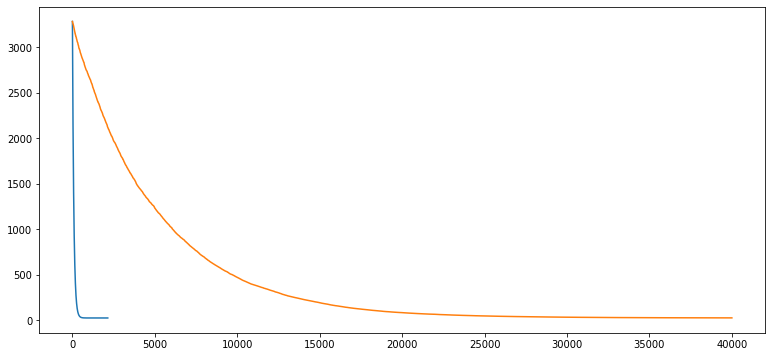

In [21]:
plt.figure(figsize=(13, 6))

plt.plot(list(dict_mse_gd.keys()), list(dict_mse_gd.values()))
plt.plot(list(dict_mse_sgd.keys()), list(dict_mse_sgd.values()))

plt.show()

##### На небольшой выборке (10000 записей) раскрываются недостатки SGD: SGD работает гораздо медленнее GD, 25.6 s против 644 ms у GD, и требует в десятки раз больше итераций для сходимости алгоритма, 40000 итераций против 980 итераций у GD.